In [255]:
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

# import matplotlib and set inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
sns.set()

# Bitwidth Comparison

In [256]:
# unipolar quantization
bits = ['1', '2', '3']
accuracy = [58.1, 67.2, 70.2]
runtime = [243.77, 387.21, 609.97]
quant_type_pos = ['unipolar', 'unipolar', 'unipolar']

# bipolar quantization
runtime_neg = [184.07, 271.42, 423.48]#, 2420]
bits_neg = ['1', '2', '3']#, '32']
accuracy_neg = [56.2, 64.0, 68.5]#, 72.7]
quant_type_neg = ['bipolar', 'bipolar', 'bipolar']#, 'full precision']

In [257]:
data_pos = {'Bitwidth': bits, 'Accuracy (top-1)': accuracy, 'Runtime (ms)': runtime, 'Quantization Type': quant_type_pos}
data_neg = {'Bitwidth': bits_neg, 'Accuracy (top-1)': accuracy_neg, 'Runtime (ms)': runtime_neg, 'Quantization Type': quant_type_neg}

In [258]:
df_pos = pd.DataFrame(data_pos)
df_neg = pd.DataFrame(data_neg)
df = pd.concat([df_pos, df_neg], ignore_index=True)

In [259]:
df

,Bitwidth,Accuracy (top-1),Runtime (ms),Quantization Type
0,1,58.1,243.77,unipolar
1,2,67.2,387.21,unipolar
2,3,70.2,609.97,unipolar
3,1,56.2,184.07,bipolar
4,2,64.0,271.42,bipolar
5,3,68.5,423.48,bipolar


In [260]:
neg_acc = df.loc[df['Quantization Type'] == 'bipolar']['Accuracy (top-1)']
pos_acc = df.loc[df['Quantization Type'] == 'unipolar']['Accuracy (top-1)']

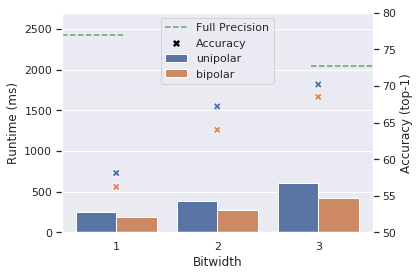

In [264]:

#counts = np.array([56000,900,5000,6000,30000,3500,300]).astype(float)
#perc =  counts/counts.sum()
#df = pd.DataFrame({"range": list("ABCDEFG"),"count":counts, "perc":perc})

fig = plt.figure()
#ax = df['runtime'].plot(kind="bar", alpha=0.7)
ax = sns.barplot(x='Bitwidth', y='Runtime (ms)', hue='Quantization Type', data=df)
ax.set_ylim([0,2700])
#ax = sns.scatterplot(x='Runtime (ms)', y='Accuracy (top-1)', size='Bitwidth', hue='Quantization Type', data=df)
#ax.set(xlabel='Activation Bits', ylabel='Runtime (ms)')
ax2 = ax.twinx()
ax2.grid(False)
ax2 = sns.scatterplot(x='Bitwidth', y='Accuracy (top-1)', hue='Quantization Type', data=df, marker='X', s=60)
ax2.get_legend().remove()
ax2.set_ylim([50, 80])
ax.axhline(y=2420, color='g', xmax=0.2, linestyle='--', label="Full Precision")
ax2.axhline(y=72.7, color='g', xmin=0.8, linestyle='--')
ax.scatter(x=0, y=0, alpha=1, marker='X', color='black', label='Accuracy', s=50, linewidths=.01)
ax.legend(loc='upper center')
#ax2.plot(ax.get_xticks(),pos_acc,marker='o', c='navy', linewidth=2)
#ax2.plot(ax.get_xticks(),neg_acc,marker='o', c='yellow', linewidth=2)

#ax.set_xticklabels(df['Bitwidth'], rotation=0)
#ax.set_ylim(0,1.3*df["Runtime (ms)"].max())
#ax2.set_ylim(0.8*df["Accuracy (top-1)"].min(),1.3*df["Accuracy (top-1)"].max())
#ax2.set(ylabel='Imagenet Top-1 Accuracy')
#plt.legend()
plt.tight_layout()
plt.savefig('/data/jwfromm/bitwidth_comp.png', dpi=900)
plt.show()

# Effect of optimizations on speedup

In [266]:
optimizations = ['unoptimized', 'tiling', 'vectorize', 'parallel', 'layer fusion']
speedups = [0.5, 0.8, 0.9, 2.0, 10.0]

In [267]:
data = {'Optimization': optimizations, 'Relative Speedup': speedups}

In [268]:
df = pd.DataFrame(data)

In [269]:
df

,Optimization,Relative Speedup
0,unoptimized,0.5
1,tiling,0.8
2,vectorize,0.9
3,parallel,2.0
4,layer fusion,10.0


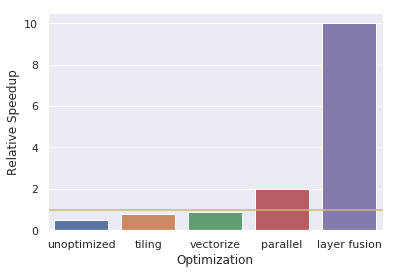

In [270]:
# This plot sucks
ax = sns.barplot(x='Optimization', y='Relative Speedup', data=df)
ax.axhline(y=1.0, color='y')
plt.savefig('/data/jwfromm/optimizations.png', dpi=900)
plt.show()

# Layer wise speed-ups on VGG

In [271]:
layers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#N = 1
bits = (np.zeros(len(layers)) + 1).astype(np.int32)
speedup = [20.1, 16.9, 32.6, 33.7, 16.1, 34.6, 35.6, 10.6, 10.6, 10.8, 20.1, 3.1, 0.7]
n1_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n1_df = pd.DataFrame(n1_data)

# N = 2
bits = (np.zeros(len(layers)) + 2).astype(np.int32)
speedup = [20.1, 31.9, 58.6, 59.8, 28.9, 56.2, 57.0, 16.9, 16.8, 16.9, 20.3, 3.2, 0.8]
n2_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n2_df = pd.DataFrame(n2_data)

#N = 3
bits = (np.zeros(len(layers)) + 3).astype(np.int32)
speedup = [20.3, 53.1, 99.9, 101.2, 46.4, 91.7, 92.5, 26.8, 26.9, 27.1, 20.8, 3.2, 0.9]
n3_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n3_df = pd.DataFrame(n3_data)

#N = 32
#bits = (np.zeros(len(layers)) + 32).astype(np.int32)
#speedup = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#n32_data = {'Layer': layers, 'Relative Speedup': speedup, 'Bitwidth': bits}
#n32_df = pd.DataFrame(n32_data)

In [272]:
joint_df = pd.concat([n1_df, n2_df, n3_df], ignore_index=True)

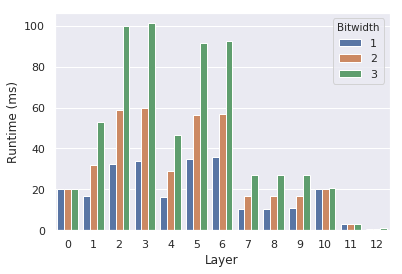

In [273]:
ax = sns.barplot(x='Layer', y='Runtime (ms)', hue='Bitwidth', data=joint_df)
plt.savefig('/data/jwfromm/layerwise_speed.png', dpi=900)
plt.show()